# Imports

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
df = pd.read_csv('../data/processed/cleaned_data.csv')

# Unique position counter

In [11]:
def categorize_midfielders(position):
    position = position.upper()
    
    if 'DM' in position:
        return 'Milieu Défensif'
    elif 'AM (C)' in position:
        return 'Milieu Offensif Central'
    elif 'M (C)' in position:
        return 'Milieu Central'
    else:
        return 'Autre'
df['Position_Categorized'] = df['Position'].apply(categorize_midfielders)

position_categorized_counts = df['Position_Categorized'].value_counts()
print(position_categorized_counts)


Position_Categorized
Milieu Défensif            3532
Milieu Central             3129
Milieu Offensif Central    2384
Autre                       852
Name: count, dtype: int64


# Midfieldiers salaries by unique position

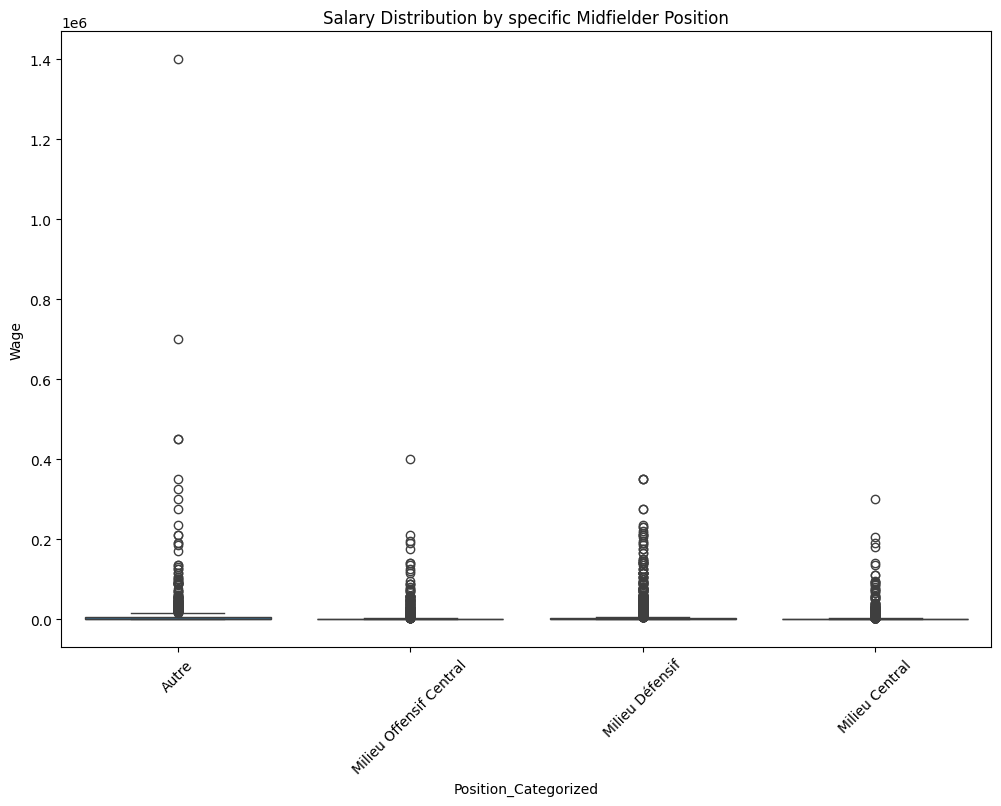

In [12]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Position_Categorized', y='Wage', data=df)
plt.xticks(rotation=45)
plt.title('Salary Distribution by specific Midfielder Position')
plt.show()

# Get top 15 more successful Defensive Midifielders in Aerial duels

/tmp/ipykernel_1520/1795081966.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='AerialScore', y='Wage', data=top_defensive_midfielders, palette='viridis')


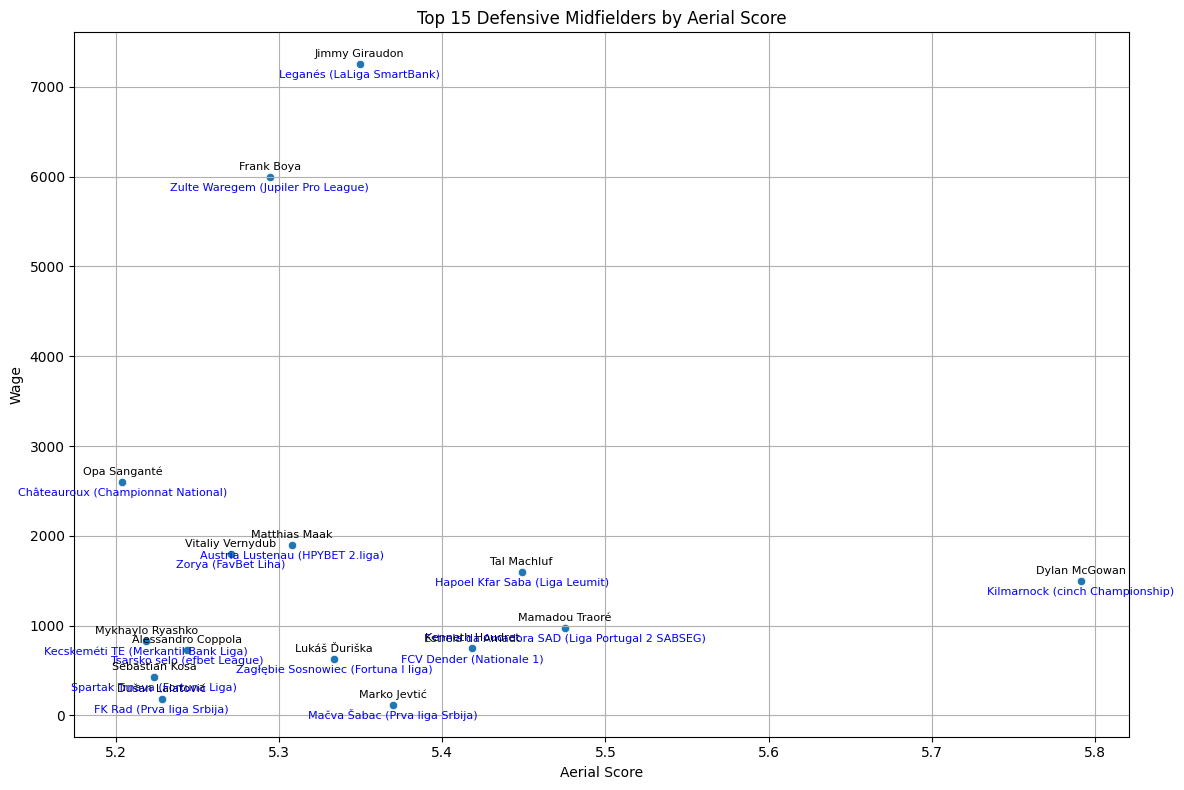

In [33]:
# Create an aerial score for def midifielders
df['AerialScore'] = df['Header Success %'] * np.log1p(df['Aerial Duels'])
top_defensive_midfielders = df[df['Position_Categorized'] == 'Milieu Défensif'].nlargest(15, 'AerialScore')
plt.figure(figsize=(12, 8))
sns.scatterplot(x='AerialScore', y='Wage', data=top_defensive_midfielders, palette='viridis')
for i in range(len(top_defensive_midfielders)):
    player_name = top_defensive_midfielders.iloc[i]['Name']
    player_club = top_defensive_midfielders.iloc[i]['Club']
    player_division = top_defensive_midfielders.iloc[i]['Division']
    aerial_score = top_defensive_midfielders.iloc[i]['AerialScore']
    wage = top_defensive_midfielders.iloc[i]['Wage']
    plt.annotate(
        player_name,
        (aerial_score, wage),
        textcoords="offset points",
        xytext=(0, 5),
        ha='center',
        fontsize=8,
        color='black'
    )
    plt.annotate(
        player_club + ' (' + player_division + ')',
        (aerial_score, wage),
        textcoords="offset points",
        xytext=(0, -10),
        ha='center',
        fontsize=8,
        color='blue'
    )
plt.grid(True)
plt.title('Top 15 Defensive Midfielders by Aerial Score')
plt.xlabel('Aerial Score')
plt.ylabel('Wage')
plt.tight_layout()
plt.show()
